In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('US_honey_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [7]:
df.tail()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


In [13]:
#shape of the data(row, columns)
df.shape

(1115, 9)

In [17]:
# Information of the data and it's types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [23]:
#check the null values
df.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [25]:
#checking the duplicates 
df.duplicated().sum()

0

In [96]:
# droping the unamed: 0 column which is not useful.
df.drop('Unnamed: 0', axis=1, inplace= True)

In [29]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [33]:
#columns Names
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [35]:
#Let us analyse the quantitative variables in the dataset
df.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


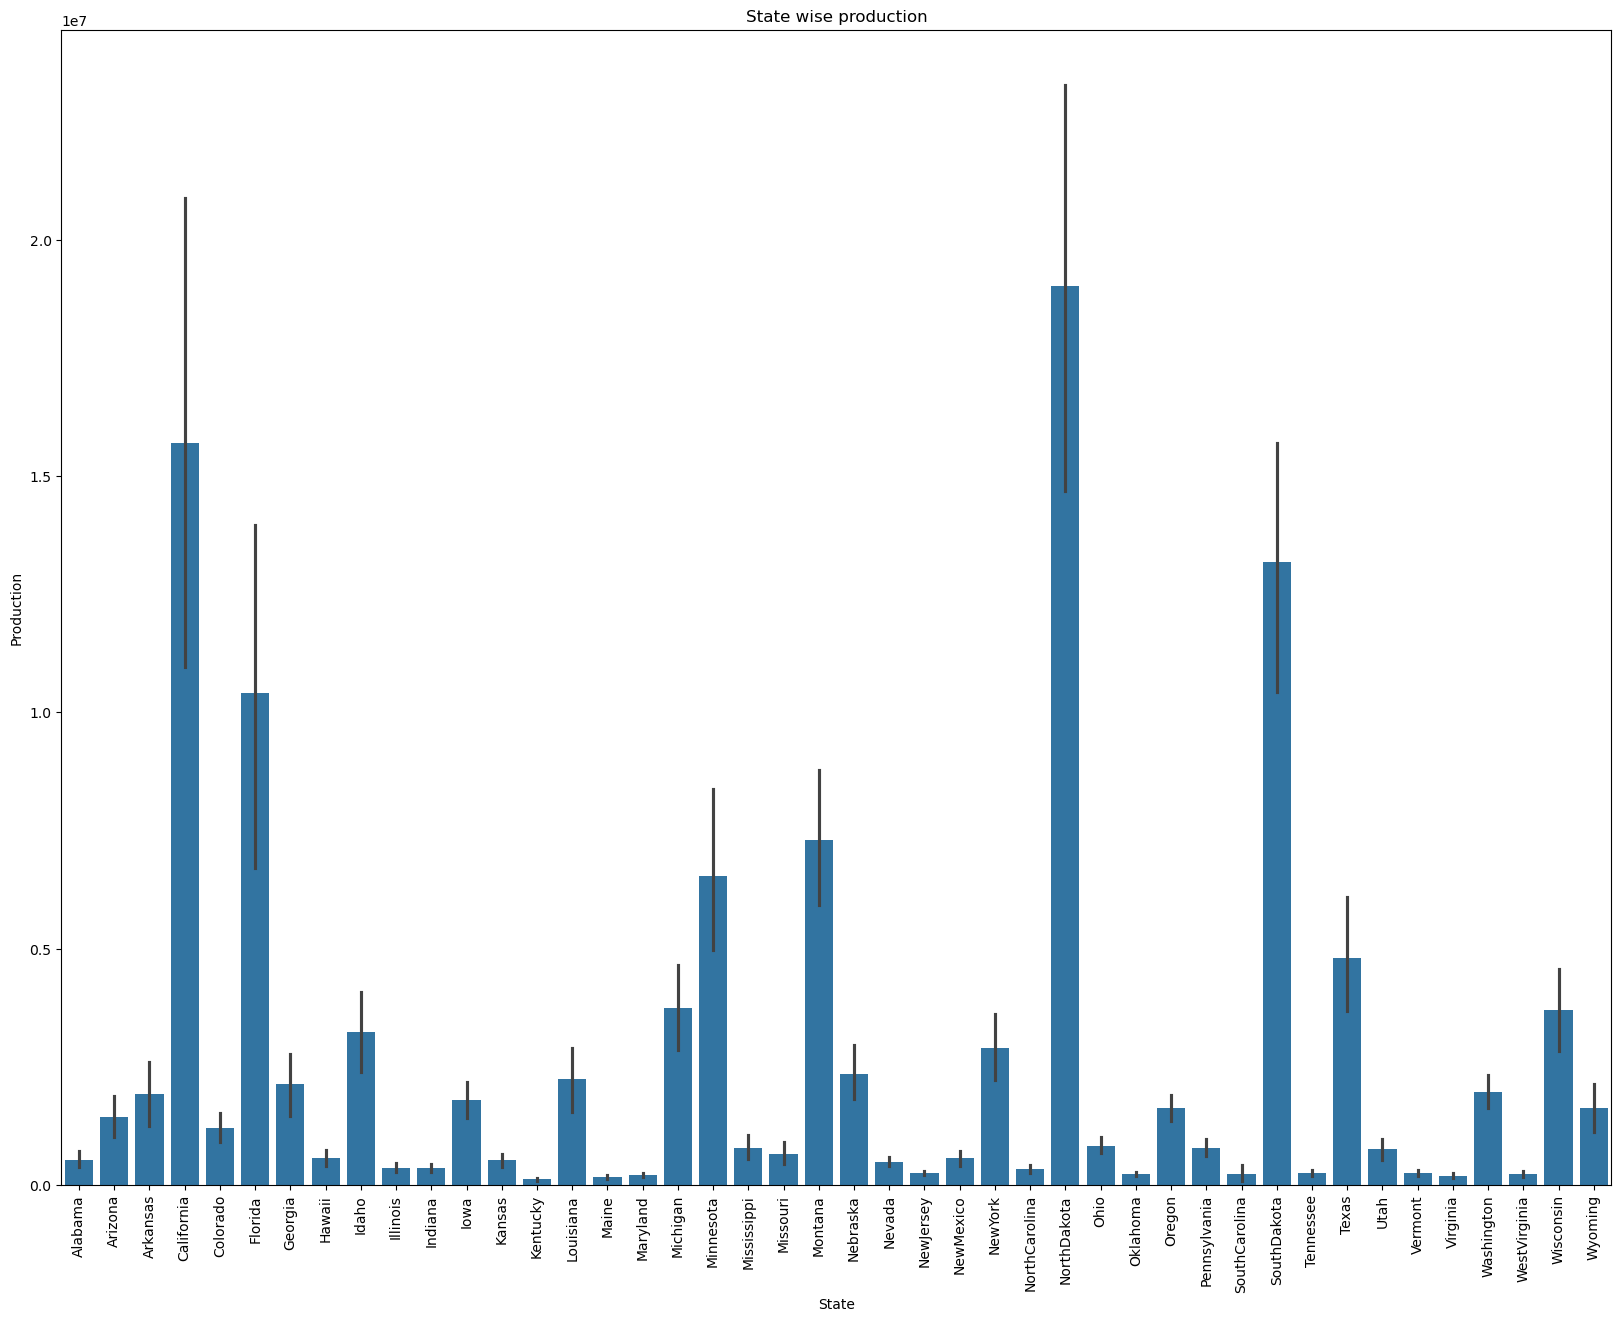

In [5]:
#state wise production
plt.figure(figsize=(20,15))
sns.barplot(x='state',y='production',data = df)
plt.title('State wise production')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation = 90)
plt.show()

##### Top and bottom 5 states vs production

In [8]:
df.columns

Index(['Unnamed: 0', 'state', 'colonies_number', 'yield_per_colony',
       'production', 'stocks', 'average_price', 'value_of_production', 'year'],
      dtype='object')

In [33]:
states_production = df.groupby('state')['production'].sum().reset_index()

In [35]:
states_production.head()

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000


In [37]:
top_5_states_production = states_production.sort_values(by='production',ascending=False).head(5)

In [39]:
top_5_states_production

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


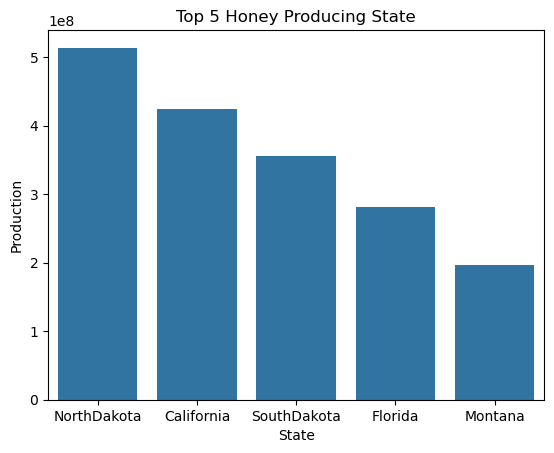

In [64]:
sns.barplot(x = 'state' , y= 'production', data=top_5_states_production)
plt.title('Top 5 Honey Producing State')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()


In [66]:
Bottom_5_states_production=states_production.sort_values(by='production',ascending=True).head(5)

In [68]:
Bottom_5_states_production

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


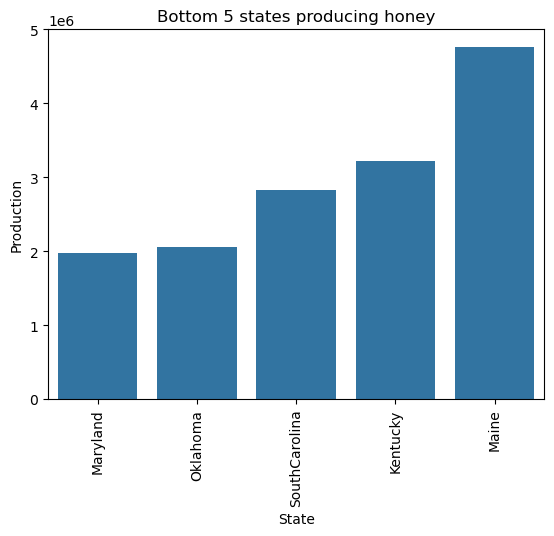

In [74]:
sns.barplot(x='state',y='production',data=Bottom_5_states_production)
plt.title('Bottom 5 states producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

In [40]:
df[['state','average_price']].head(150)

,state,average_price
0,Alabama,62.0
1,Arizona,68.0
2,Arkansas,64.0
3,California,60.0
4,Colorado,68.0
...,...,...
145,Louisiana,59.0
146,Maine,69.0
147,Maryland,110.0
148,Michigan,66.0


##### grouping by state and year with there avg_price 

In [54]:
df.groupby(['state','year'])['average_price'].mean().reset_index()

,state,year,average_price
0,Alabama,1995,62.00
1,Alabama,1996,86.00
2,Alabama,1997,81.00
3,Alabama,1998,72.00
4,Alabama,1999,56.00
...,...,...,...
1110,Wyoming,2017,161.00
1111,Wyoming,2018,1.91
1112,Wyoming,2019,1.43
1113,Wyoming,2020,1.71


In [ ]:
df['state'].duplicated().sum()

In [138]:
# to get the single state result
df[df['state'].str.contains('Alabama')]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
44,Alabama,16000,64,1024000,102000,86.00,881000,1996
88,Alabama,14000,66,924000,92000,81.00,748000,1997
131,Alabama,16000,71,1136000,159000,72.00,818000,1998
174,Alabama,17000,68,1156000,185000,56.00,647000,1999
217,Alabama,16000,78,1248000,187000,59.00,736000,2000
260,Alabama,14000,73,1022000,235000,71.00,726000,2001
303,Alabama,12000,86,1032000,103000,111.00,1146000,2002
347,Alabama,13000,82,1066000,43000,126.00,1343000,2003
391,Alabama,12000,87,1044000,282000,140.00,1462000,2004


In [80]:
states_avg_price=df.groupby('state')['average_price'].max().reset_index()

In [100]:
top_five_avg_price_of_states = states_avg_price.sort_values('average_price', ascending= False).head(5)

In [102]:
top_five_avg_price_of_states

,state,average_price
24,NewJersey,874.0
39,Virginia,585.0
15,Maine,543.0
9,Illinois,542.0
38,Vermont,489.0


In [98]:
df[df['average_price'] == 874.0]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
937,NewJersey,13000,28,167000,167000,874.0,3181000,2017


##### which states are rarely contributing to honey production for the last 27 years?


In [140]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [14]:
rarely_contribute_state = df.groupby(['state','year'])['production'].sum().reset_index()

In [16]:
rarely_contribute_state

,state,year,production
0,Alabama,1995,928000
1,Alabama,1996,1024000
2,Alabama,1997,924000
3,Alabama,1998,1136000
4,Alabama,1999,1156000
...,...,...,...
1110,Wyoming,2017,186000
1111,Wyoming,2018,175000
1112,Wyoming,2019,306000
1113,Wyoming,2020,608000


In [18]:
top_rarely_contribute_state = rarely_contribute_state.sort_values(by ='production', ascending=True).reset_index().head()

In [22]:
top_rarely_contribute_state.drop('index' , inplace=True,axis=1)

In [24]:
top_rarely_contribute_state

,state,year,production
0,Kentucky,2011,12000
1,Alabama,2015,13000
2,Alabama,2018,14000
3,SouthCarolina,2018,15000
4,Maine,2011,17000


states that rarly contributing to honey production for the last 27 years


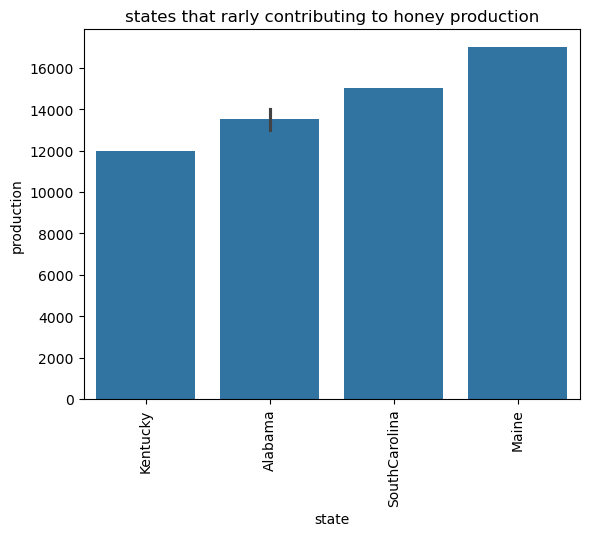

In [26]:
print('states that rarly contributing to honey production for the last 27 years')
sns.barplot(x='state',y = 'production', data=top_rarely_contribute_state)
plt.title('states that rarly contributing to honey production')
plt.xlabel = ('State')
plt.ylabel = ('Producton')
plt.xticks(rotation = 90)
plt.show()
              

##### 2) Which are the top 5 Honey producing states in the US ?

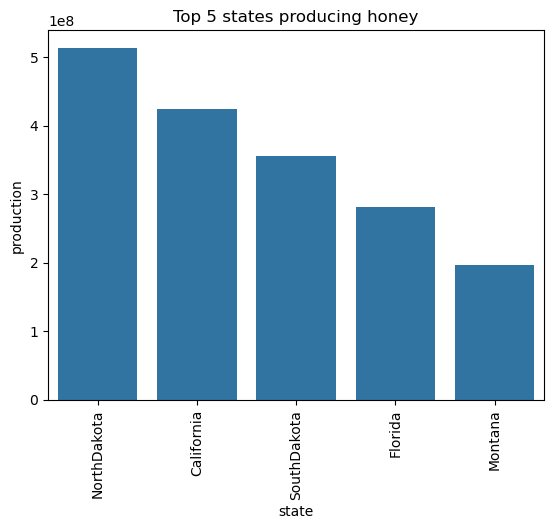

In [134]:
sns.barplot(x='state',y='production' , data= top_5_states_production)
plt.title('Top 5 states producing honey')
plt.xlabel = ('State')
plt.ylable = ('Producton')
plt.xticks(rotation=90)
plt.show()

##### what is the change in  mean average price of honey from 1995 to 2021

In [48]:
mean_change_in_avg_price = df.loc[(df['year'] >=1995)&(df['year']<=2021)]

In [50]:
mean_change_in_avg_price

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [52]:
mean_change_in_avg_price_df1 = mean_change_in_avg_price.groupby('year')['average_price'].mean()

In [55]:
mean_change_in_avg_price_df1

year
1995     74.840909
1996     99.568182
1997     91.325581
1998     83.720930
1999     80.325581
2000     79.023256
2001     88.465116
2002    133.204545
2003    151.068182
2004    132.350000
2005    116.341463
2006    134.341463
2007    140.170732
2008    160.878049
2009    176.195122
2010    192.900000
2011    216.725000
2012    236.700000
2013    260.717949
2014    282.025000
2015    292.625000
2016    291.925000
2017    302.775000
2018      3.083500
2019      2.925500
2020      3.050000
2021      3.334250
Name: average_price, dtype: float64

In [59]:
change_in_mean =  mean_change_in_avg_price_df1.loc[1995]-mean_change_in_avg_price_df1.loc[2021]
print('Chnage in mean from 1995 to 2021 is: ', change_in_mean)

Chnage in mean from 1995 to 2021 is:  71.5066590909091


##### which year was the year when production of honey is whole US was the highest?

In [64]:
highest_production_year = df.groupby('year')['production'].sum().reset_index()

In [66]:
highest_production_year.sort_values(by = 'production',ascending=False).head(1)

,year,production
5,2000,220320000


##### **5) From the above inference we get the production was highest in the year 2000, now let infer which state was having highest contribution in that year**

In [72]:
highest_production_state = df.groupby(['state','year'])['production'].sum().reset_index()

In [82]:
state_2000_year = highest_production_state.loc[(highest_production_state['year']==2000)]

In [86]:
state_2000_year.sort_values(by='production',ascending=False).head(1)

,state,year,production
721,NorthDakota,2000,33350000


##### Q6) Which states have the highest no. of colonies in the year 2000?

In [89]:
highest_colony=df.groupby(['state','year'])['colonies_number'].sum().reset_index()

In [91]:
highest_colony.head()

,state,year,colonies_number
0,Alabama,1995,16000
1,Alabama,1996,16000
2,Alabama,1997,14000
3,Alabama,1998,16000
4,Alabama,1999,17000


In [97]:
state_2000_year_colony= highest_colony.loc[(highest_colony['year']==2000)]

In [99]:
bar=state_2000_year_colony.sort_values(by='colonies_number',ascending=False).head(5)

In [102]:
bar

,state,year,colonies_number
86,California,2000,440000
721,NorthDakota,2000,290000
850,SouthDakota,2000,235000
140,Florida,2000,232000
472,Minnesota,2000,150000


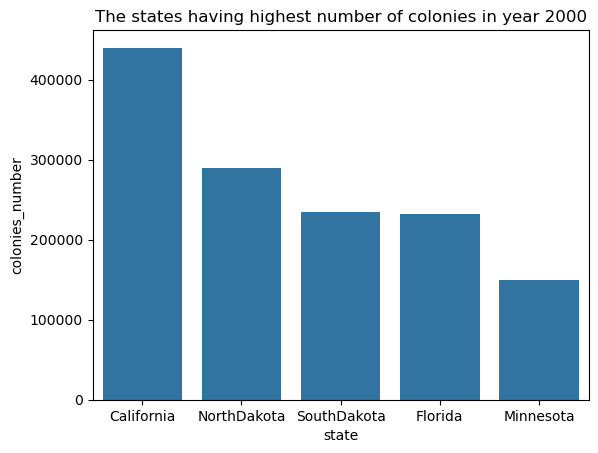

In [136]:
sns.barplot(x='state',y='colonies_number',data=bar)
plt.title('The states having highest number of colonies in year 2000')
plt.xlabel = ('state')
plt.ylabel = ('colonies_number')
plt.show()